# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [4]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [8]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [12]:
# Display the first few rows of the dataset
print(data.head())

# Step 1: Remove columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Step 2: Drop rows with missing values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

# Step 3: Impute missing values in numerical columns with the average value
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    data[column].fillna(data[column].mean())

# Check if there are any remaining missing values
missing_values = data.isnull().sum()
print("Missing values after cleaning:\n", missing_values)

# Display the first few rows of the cleaned dataset
data.head()

  ApplicationDate   Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01  45.0         39948          617         Employed   
1      2018-01-02  38.0         39709          628         Employed   
2      2018-01-03  47.0         40724          570         Employed   
3      2018-01-04  58.0         69084          545         Employed   
4      2018-01-05  37.0        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.72497

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [14]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,19900,19800.000000,19900.000000,19900.000000,19900,19900,19900.000000,19900.000000,19900.000000,19900,...,1.990000e+04,19900.000000,19900.000000,19900.000000,1.990000e+04,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000
unique,19900,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,16953,6020,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.755455,59149.157739,571.579045,NaN,NaN,17.527487,24882.674523,54.067538,NaN,...,3.625414e+04,4890.496202,0.799855,5.002261,7.222712e+04,0.239149,0.239137,911.294816,0.402078,0.238191
std,NaN,11.633241,40340.641813,51.016271,NaN,NaN,11.319663,13434.035867,24.667393,NaN,...,4.728501e+04,3295.557123,0.120621,2.236853,1.176969e+05,0.035512,0.042195,674.261264,0.338466,0.425987
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000
25%,NaN,31.750000,31688.250000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,1.119500e+04,2630.083333,0.727352,3.000000,8.729250e+03,0.213916,0.209198,493.763700,0.179853,0.000000
50%,NaN,40.000000,48577.000000,578.000000,NaN,NaN,17.000000,21915.500000,48.000000,NaN,...,2.220050e+04,4035.041667,0.820872,5.000000,3.284550e+04,0.236176,0.235436,728.511452,0.302719,0.000000
75%,NaN,48.000000,74372.000000,609.000000,NaN,NaN,25.000000,30828.250000,72.000000,NaN,...,4.313500e+04,6161.062500,0.892278,6.000000,8.882125e+04,0.261571,0.265530,1112.478552,0.509294,0.000000


### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns

# If all the categorical values of a column are unique, this column does not provide any statistical information and should be deleted.

for column in categorical_columns:
    if data[column].nunique() == len(data):  # Check if all values are unique
        print(f"Dropping column: {column} (all unique values)")
        data = data.drop(columns=[column])

print("Columns after removing those with unique values:\n", data.columns)

# Apply one-hot encoding to the remaining categorical columns

remaining_categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=remaining_categorical_columns, drop_first=True)

print("Data after one-hot encoding:\n", data.head())

Dropping column: ApplicationDate (all unique values)
Columns after removing those with unique values:
 Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')
Data after one-hot encoding:
     Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0  45.0         39948

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [21]:
from sklearn.model_selection import train_test_split

# Step 1: Define the label (target) and features
X = data.drop(columns=['LoanApproved'])  # Features (drop the target column)
y = data['LoanApproved']  # Label (the target column)

# Step 2: Split the dataset into training (80%) and testing (20%) sets
# Use your student ID as the random_state value for reproducibility
random_state_value = 46582345  # Replace this with your actual student ID

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_value)

# Display the shape of the resulting datasets
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)

Training data shape (X_train): (15920, 44)
Testing data shape (X_test): (3980, 44)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [24]:
# handling missing values 

from sklearn.impute import SimpleImputer

# Step 1: Initialize the SimpleImputer to replace NaNs with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or another strategy

# Step 2: Impute the missing values in the training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [26]:
# Report two classification performance metrics (accuracy and f1-score) on the testing data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 3: Scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)  # Scale the imputed training data
X_test_scaled = scaler.transform(X_test_imputed)  # Scale the imputed testing data

# Step 4: Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [28]:
# Report Two Classification Performance Metrics (Accuracy and F1-Score) on the Testing Data
from sklearn.metrics import accuracy_score, f1_score

# Step 5: Make predictions on the testing set
y_test_pred = logistic_model.predict(X_test_scaled)

# Step 6: Calculate Accuracy and F1-score for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print testing results
print("Testing Data Accuracy:", test_accuracy)
print("Testing Data F1 Score:", test_f1_score)

Testing Data Accuracy: 0.9658291457286432
Testing Data F1 Score: 0.9273504273504274


In [30]:
# Report the Two Metrics on the Training Data and Compare the Results with the Testing Data

# Step 7: Make predictions on the training set
y_train_pred = logistic_model.predict(X_train_scaled)

# Step 8: Calculate Accuracy and F1-score for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

# Print training results
print("Training Data Accuracy:", train_accuracy)
print("Training Data F1 Score:", train_f1_score)

# Step 9: Check for overfitting by comparing training and testing accuracy
if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model does not show signs of overfitting.")

Training Data Accuracy: 0.9669597989949749
Training Data F1 Score: 0.9303126656067833
The model may be overfitting.


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

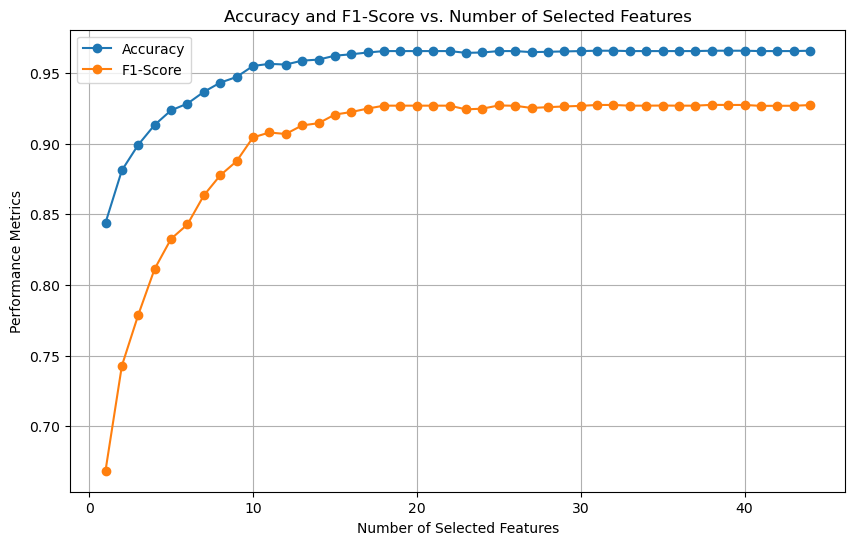

In [33]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)

# Step 2: Initialize the Recursive Feature Elimination (RFE) model
# We will use RFE to recursively eliminate features and rank their importance
rfe = RFE(estimator=logistic_model, n_features_to_select=1)  # Start with 1 feature

# Step 3: Fit RFE with the training data
rfe.fit(X_train_scaled, y_train)

# Step 4: Create lists to store accuracy and F1-score for each number of features
accuracy_list = []
f1_list = []
num_features_list = range(1, X_train_scaled.shape[1] + 1)

# Step 5: Evaluate the model performance for different numbers of features
for num_features in num_features_list:
    # Initialize RFE with the current number of features
    rfe = RFE(estimator=logistic_model, n_features_to_select=num_features)
    
    # Fit RFE
    rfe.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_test_pred_rfe = rfe.predict(X_test_scaled)
    
    # Calculate accuracy and F1-score
    accuracy_list.append(accuracy_score(y_test, y_test_pred_rfe))
    f1_list.append(f1_score(y_test, y_test_pred_rfe))

# Step 6: Plot the Accuracy and F1-score with respect to the number of selected features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracy_list, label="Accuracy", marker='o')
plt.plot(num_features_list, f1_list, label="F1-Score", marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("Performance Metrics")
plt.title("Accuracy and F1-Score vs. Number of Selected Features")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Step 1: Choose the optimal number of features based on the visualization
# After analyzing the plot, select the number of features that provides a good balance between accuracy and F1-Score
# For this example, let's assume the optimal number of features is 10 (adjust based on your visualization)
optimal_num_features = 10  # Replace with the chosen number based on your plot

# Step 2: Initialize RFE with the optimal number of features
rfe_optimal = RFE(estimator=logistic_model, n_features_to_select=optimal_num_features)

# Step 3: Fit the RFE with the optimal number of features using the training data
rfe_optimal.fit(X_train_scaled, y_train)

# Step 4: Make predictions using the reduced set of features on the testing data
y_test_pred_optimal = rfe_optimal.predict(X_test_scaled)

# Step 5: Calculate Accuracy and F1-Score for the testing data with the optimal number of features
optimal_test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
optimal_test_f1_score = f1_score(y_test, y_test_pred_optimal)

# Print the results after selecting the optimal number of features
print(f"Optimal number of features: {optimal_num_features}")
print(f"Testing Accuracy with {optimal_num_features} features:", optimal_test_accuracy)
print(f"Testing F1-Score with {optimal_num_features} features:", optimal_test_f1_score)

# Step 6: Get the ranking of features after performing RFE with the optimal number of features
feature_ranking = rfe_optimal.ranking_
print("Feature ranking (1 = selected, higher = less important):\n", feature_ranking)

Optimal number of features: 10
Testing Accuracy with 10 features: 0.9550251256281407
Testing F1-Score with 10 features: 0.9044313934863855
Feature ranking (1 = selected, higher = less important):
 [ 5 10  1 13  1 12 32 17 21 20 33 30  1  1  8  1 14 29 15 16  1 28 31  1
 11  1 26  1 27  2  6  4  1  3 19 18 23  9 35  7 24 22 25 34]


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer  # To handle missing values

# Assuming X contains the selected features and y contains the target variable (LoanApproved)
# Replace 'X' and 'y' with your actual data
# X = pd.DataFrame(...)  # Your feature dataframe
# y = pd.Series(...)     # Your target variable (e.g., 'LoanApproved')

# Step 1: Impute missing values in X using the mean for numerical columns
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or 'most_frequent' as needed
X = imputer.fit_transform(X)

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Step 4: Train the classifier using the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions
# Predict on the training data
y_train_pred = knn.predict(X_train)

# Predict on the testing data
y_test_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Calculate accuracy and F1-score for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

# Calculate accuracy and F1-score for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Step 7: Report the results
print(f"Training Data: Accuracy = {train_accuracy:.4f}, F1-Score = {train_f1_score:.4f}")
print(f"Testing Data: Accuracy = {test_accuracy:.4f}, F1-Score = {test_f1_score:.4f}")

# Step 8: Justification on overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting as the training accuracy is higher than the testing accuracy.")
else:
    print("The model is generalizing well since the testing accuracy is close to the training accuracy.")

Training Data: Accuracy = 1.0000, F1-Score = 1.0000
Testing Data: Accuracy = 0.8377, F1-Score = 0.6567
The model might be overfitting as the training accuracy is higher than the testing accuracy.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

Best value of K: 27


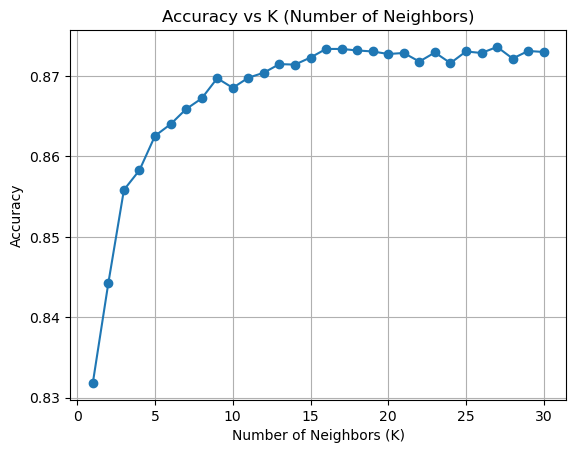

Best Model Test Data: Accuracy = 0.8807, F1-Score = 0.7300


In [39]:
# Import necessary libraries for grid search and plotting
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the range of K values to test (from 1 to 30)
param_grid = {'n_neighbors': np.arange(1, 31)}

# Step 2: Create the KNN model
knn = KNeighborsClassifier()

# Step 3: Use GridSearchCV with 5-fold cross-validation to search for the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 4: Get the best value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K: {best_k}")

# Step 5: Plot accuracy for each K value
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.plot(param_grid['n_neighbors'], mean_test_scores, marker='o')
plt.title("Accuracy vs K (Number of Neighbors)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Step 6: Re-train the model with the best K and evaluate on the test data
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_test_pred_best = best_knn.predict(X_test)

# Step 8: Report accuracy and F1-score for the best model
best_test_accuracy = accuracy_score(y_test, y_test_pred_best)
best_test_f1_score = f1_score(y_test, y_test_pred_best)

print(f"Best Model Test Data: Accuracy = {best_test_accuracy:.4f}, F1-Score = {best_test_f1_score:.4f}")

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

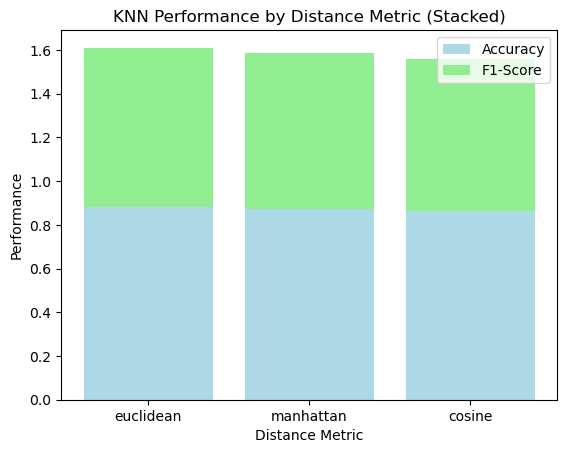

Euclidean - Accuracy: 0.8807, F1-Score: 0.7300
Manhattan - Accuracy: 0.8741, F1-Score: 0.7142
Cosine - Accuracy: 0.8633, F1-Score: 0.6961
The best performing metric is: euclidean
The worst performing metric is: cosine


In [41]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Function to train KNN with different distance metrics and return performance
def evaluate_knn(metric_name):
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric_name)
    knn.fit(X_train, y_train)
    
    # Predictions on the test data
    y_test_pred = knn.predict(X_test)
    
    # Calculate accuracy and F1-score
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    
    return test_accuracy, test_f1_score

# Step 1: Evaluate performance for each distance metric
metrics = ['euclidean', 'manhattan', 'cosine']
results = {'accuracy': [], 'f1_score': []}

for metric in metrics:
    accuracy, f1 = evaluate_knn(metric)
    results['accuracy'].append(accuracy)
    results['f1_score'].append(f1)

# Step 2: Visualize the performance using a stacked bar chart
index = np.arange(len(metrics))

# Create the figure
fig, ax = plt.subplots()

# Stacked bar chart
bar1 = ax.bar(index, results['accuracy'], label='Accuracy', color='lightblue')
bar2 = ax.bar(index, results['f1_score'], bottom=results['accuracy'], label='F1-Score', color='lightgreen')

# Add labels, title, and legend
ax.set_xlabel('Distance Metric')
ax.set_ylabel('Performance')
ax.set_title('KNN Performance by Distance Metric (Stacked)')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()

# Step 3: Report the performance metrics
for i, metric in enumerate(metrics):
    print(f"{metric.capitalize()} - Accuracy: {results['accuracy'][i]:.4f}, F1-Score: {results['f1_score'][i]:.4f}")

# Step 4: Determine best and worst performing distance metric
best_metric = metrics[np.argmax(results['accuracy'])]
worst_metric = metrics[np.argmin(results['accuracy'])]

print(f"The best performing metric is: {best_metric}")
print(f"The worst performing metric is: {worst_metric}")

In [ ]:
Finished Portfolio_Part_3